# Monte Carlo Method

Monte Carlo methods are a class of algorithms relying on *repeated random sampling* to obtain numerical results. There are several variants of the Monte Carlo methodology, but the usual pattern is the following:

1. Define a domain of possible inputs
2. Generate inputs randomly from a probability distribution over the domain
3. Perform a *deterministic* computation on the inputs
4. Aggregate the results

## An example: calculating $\pi$
We can use this methodology to estimate the value of $\pi$. We will rely on the following interesting deterministic property:

$$
\text{Given a quadrant inscribed in a unit square, the ratio between the area of the quadrant and the area of the square is }\frac{\pi}{4}
$$

We will apply the Monte Carlo Method as follows:

1. Draw a square and inscribe a quadrant in it
2. Uniformly scatter a given number of points over the square (our *samples*)
3. Count the number of points inside the quadrant (the ones having a distance from the origin less than 1)
4. The ratio between the inside-count and the total-sample-count is an estimate of $\frac{\pi}{4}$
5. Multiply the ratio by 4 to obtain $\pi$

In [64]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

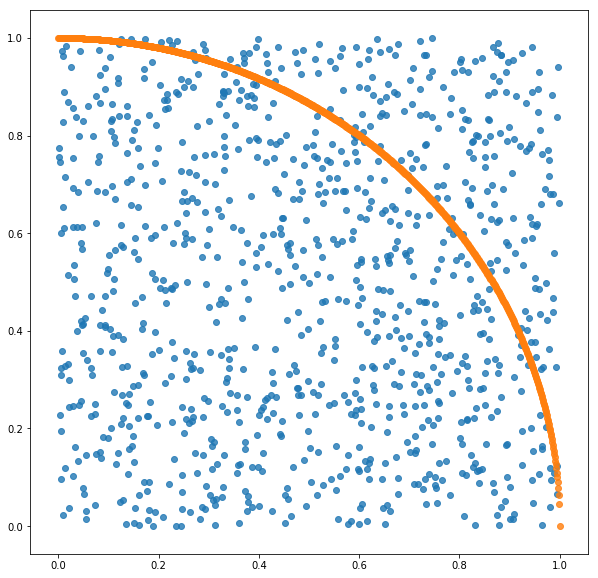

In [58]:
plt.figure(figsize=(10, 10))
sns.regplot(x=np.random.uniform(size=1000), y=np.random.uniform(size=1000), fit_reg=False)
circle_xx = np.linspace(0, 1, 1000)
circle_yy = np.sqrt(1 - circle_xx**2)
sns.regplot(x=circle_xx, y=circle_yy, fit_reg=False)
plt.show()

In [59]:
n_samples = 100000

xx = np.random.uniform(size=(n_samples,)) # uniform sampling of x coordinates
yy = np.random.uniform(size=(n_samples,)) # uniform sampling of y coordinates

In [60]:
samples_distances = np.sqrt(xx**2 + yy**2) # calculate the distances of all points from the origin

In [61]:
# number of points inside the quadrant
n_samples_inside_the_quadrant = samples_distances[samples_distances <= 1].shape[0]

# estimation of pi
pi = (n_samples_inside_the_quadrant / samples_distances.shape[0])*4
pi

3.14236

### Increasing the number of samples
Let's see what happens by increasing the number of used samples.

In [65]:
pis = []

for n_samples in tqdm(range(1, 100000)):
    xx = np.random.uniform(size=(n_samples,))
    yy = np.random.uniform(size=(n_samples,))
    samples_distances = np.sqrt(xx**2 + yy**2)
    n_samples_inside_the_quadrant = samples_distances[samples_distances <= 1].shape[0]
    pi = (n_samples_inside_the_quadrant / samples_distances.shape[0])*4
    pis.append(pi)

100%|██████████| 99999/99999 [04:14<00:00, 392.90it/s]


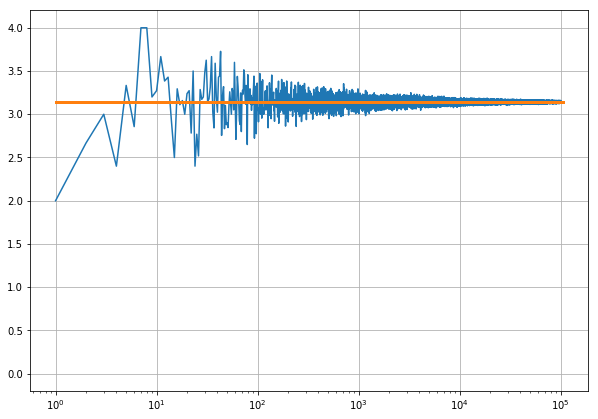

In [109]:
plt.figure(figsize=(10, 7))
plt.plot(pis)
xmin, xmax = plt.xlim()
plt.plot([1, xmax], [np.pi, np.pi], linewidth=3)
plt.xscale("log")
plt.grid()

plt.show()